# 2010 Baja CA EQ, QTM Catalog Mapping: Density Grid Test Points, β-statistic, 30 days AFTER
Updated 4/6 for Magnitude of Completeness: M > 1.0


In [1]:
# IMPORT CELL; updated 2/11/21

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') 
from importlib import reload
import time
import math
import scipy.stats as stats

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

import obspy
from obspy.core import UTCDateTime
from obspy import read

import obspy.geodetics as gd # Imported whole file
#from obspy.geodetics import locations2degrees # calc_dist() alike?
#from obspy.taup.taup_geo import calc_dist # calc_dist()

import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

print("Imported! ")

Imported! 


In [2]:
%%time
QTM_Range = pd.read_pickle("QTM_Range.pkl")
QTM_Range = QTM_Range.loc[QTM_Range["MAGNITUDE"]>= 1.0]

Wall time: 809 ms


In [3]:
# Set mean latitudes and longitudes
MeanLat = QTM_Range["LATITUDE"].mean()
MeanLon = QTM_Range["LONGITUDE"].mean() 

# Define two more datasets of 30 days before and 30 days after Baja EQ
QTM_TEMP = QTM_Range.loc[QTM_Range["EVENTID"] == ""] # Get Baja EQ
QTM_TEMP = QTM_TEMP.iloc[0]
BajaTimestamp = float(QTM_TEMP["TIMESTAMP"])
BajaTimestamp

1270420842.0

In [4]:
QTM_Range_BEFORE = QTM_Range.loc[QTM_Range["TIMESTAMP"] <= BajaTimestamp]
QTM_Range_AFTER = QTM_Range.loc[QTM_Range["TIMESTAMP"] >= BajaTimestamp]

QTM_Range_BEFORE.describe()
QTM_Range_AFTER

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
356879,2010,4,4,22,40,42.000,,32.28600,-115.29500,10.000,...,,,,,2010-04-04T22:40:42.000000Z,1.270421e+09,2010-04-04T22:40:42.000000Z,1.270421e+09,0.0,0.0
356879,2010,4,4,22,40,42.000,,32.28600,-115.29500,10.000,...,,,,,2010-04-04T22:40:42.000000Z,1.270421e+09,2010-04-04T22:40:42.000000Z,1.270421e+09,0.0,0.0
356880,2010,4,4,22,40,42.160,14607652,32.27350,-115.29400,13.990,...,14607652,1.0,0.01,0,2010-04-04T22:40:42.160000Z,1.270421e+09,2010-04-04T22:40:42.159999Z,1.270421e+09,0.0,0.0
356881,2010,4,4,22,41,45.870,347184,34.43929,-116.93557,-0.583,...,9807541,0.264,0.026,0,2010-04-04T22:41:45.870000Z,1.270421e+09,2010-04-04T22:41:45.869999Z,1.270421e+09,0.0,0.0
356883,2010,4,4,22,42,7.710,347186,33.17864,-115.61955,1.762,...,11050669,0.251,0.018,0,2010-04-04T22:42:07.710000Z,1.270421e+09,2010-04-04T22:42:07.710000Z,1.270421e+09,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479959,2010,5,4,22,28,10.387,14693548,32.70310,-116.02574,10.285,...,14693548,1.0,0.01,1,2010-05-04T22:28:10.387000Z,1.273012e+09,2010-05-04T22:28:10.387000Z,1.273012e+09,30.0,720.0
479961,2010,5,4,22,28,23.050,465015,32.98535,-115.58214,8.841,...,15199801,0.195,0.02,0,2010-05-04T22:28:23.050000Z,1.273012e+09,2010-05-04T22:28:23.050000Z,1.273012e+09,30.0,720.0
479970,2010,5,4,22,32,30.153,14693564,33.92484,-117.83583,6.735,...,14693564,1.0,0.01,1,2010-05-04T22:32:30.153000Z,1.273012e+09,2010-05-04T22:32:30.152999Z,1.273012e+09,30.0,720.0
479972,2010,5,4,22,34,42.330,14693572,32.22300,-115.27750,8.680,...,14693572,1.0,0.01,0,2010-05-04T22:34:42.330000Z,1.273012e+09,2010-05-04T22:34:42.329999Z,1.273012e+09,30.0,720.0


In [5]:
QTM_Range["LONGITUDE"].values[0]
len(QTM_Range)
QTM_Range["LONGITUDE"].values

Faults = pd.read_csv("cafaults.xy", sep = "[\s]", names = ["LONGITUDE", "LATITUDE"])
# Read in fault traces
Faults
#Faults.describe()
#print(Faults.LATITUDE)
#Faults["LONGITUDE"].astype(float)
#Faults = Faults.loc[Faults["LONGITUDE"] == float]
#Faults.columns = ["LONGITUDE", "LATITUDE"]
#Faults
#Faults.LONGITUDE.astype(float)

FaultsIndices = list(Faults.loc[Faults["LONGITUDE"] == ">"].index)
#FaultsIndices

## Density Grid: First Gridpoint - Point1

(32.7, -115.8)

In [6]:
GridPoints = pd.read_csv("Maps/Density Grid/GridPoints.csv")

In [7]:
# Create first point for analysis

Point1 = GridPoints.loc[(GridPoints["LATITUDE"] >= 32.7) & (GridPoints["LONGITUDE"] >= -115.8)]
#Point1 = Point1.loc[Point1["LONGITUDE"] == -115.8]
Point1 = Point1.iloc[0]
Point1 # 32.7, -115.8

Unnamed: 0    742.0
LATITUDE       32.7
LONGITUDE    -115.8
Name: 742, dtype: float64

In [8]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists1_Deg = gd.locations2degrees(Point1.LATITUDE, Point1.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point1
Dists1_KM = gd.degrees2kilometers(Dists1_Deg)
# Converted all distances to kilometers
Dists1_KM


array([ 138.21121549,  105.69664657,   81.24080446, ...,  233.09532607,
         72.22400857,   74.94107375])

## Density Grid: Second Point - Point2
Along fault line<br>(32.6585, -115.8862)

In [9]:
# Create second point for analysis: fault line

Point2 = pd.DataFrame({"LATITUDE" : [32.6585], "LONGITUDE" : [-115.8862]})
#Point2["LATITUDE"] = 33.0403 # 33.0403, -116.5071
Point2

,LATITUDE,LONGITUDE
0,32.6585,-115.8862


In [10]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists2_Deg = gd.locations2degrees(Point2.LATITUDE, Point2.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point2
Dists2_KM = gd.degrees2kilometers(Dists2_Deg)
# Converted all distances to kilometers
Dists2_KM

array([ 140.77905394,  106.45094779,   81.76024654, ...,  229.47999423,
         74.88588297,   77.55484121])

### Density Grid: Third Point - Point3
Along fault line<br>(33.5059, -116.4916)

In [11]:
# Create third point for analysis: fault line

Point3 = pd.DataFrame({"LATITUDE" : [33.5059], "LONGITUDE" : [-116.4916]})
#Point2["LATITUDE"] = 33.0403 # 33.0403, -116.5071
Point3

,LATITUDE,LONGITUDE
0,33.5059,-116.4916


In [12]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists3_Deg = gd.locations2degrees(Point3.LATITUDE, Point3.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point3
Dists3_KM = gd.degrees2kilometers(Dists3_Deg)
# Converted all distances to kilometers
Dists3_KM

array([  51.09038005,   15.64109087,   30.61380369, ...,  132.77026609,
        182.22734061,  184.95501046])

## Density Grid: Fourth Point - Point4
Salton Sea Geothermal Field<br>(33.163333, -115.616667)

In [13]:
# Create fourth point for analysis: Salton Sea Geothermal Field

Point4 = pd.DataFrame({"LATITUDE" : [33.163333], "LONGITUDE" : [-115.616667]})
#Point3["LATITUDE"] = 33.0403 # 33.0403, -116.5071
Point4

,LATITUDE,LONGITUDE
0,33.163333,-115.616667


In [14]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists4_Deg = gd.locations2degrees(Point4.LATITUDE, Point4.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point3
Dists4_KM = gd.degrees2kilometers(Dists4_Deg)
# Converted all distances to kilometers
Dists4_KM

array([  97.92775347,   78.3275777 ,   60.49806636, ...,  222.40687332,
        109.27100427,  111.82848654])

In [15]:
# Plot density points

Points = pd.DataFrame(Point1).T
Points = Points.drop(labels = "Unnamed: 0", axis = 1)
Points
Points = pd.concat([Points, Point2, Point3, Point4])
#type(Point1)
# Points = Point1, Point2, Point3, Point4
Points

,LATITUDE,LONGITUDE
742,32.700000,-115.800000
0,32.658500,-115.886200
0,33.505900,-116.491600
0,33.163333,-115.616667


In [16]:
Point5 = pd.DataFrame({"LATITUDE" : [32.5], "LONGITUDE" : [-116.5]})
Dists5_Deg = gd.locations2degrees(Point5.LATITUDE, Point5.LONGITUDE,
                                 QTM_Range.LATITUDE, QTM_Range.LONGITUDE)

## β-statistic (3/4)
All points

In [17]:
# Redefine all points; distances counts: 0.1deg 
Point1 = pd.DataFrame({"LATITUDE" : [32.7], "LONGITUDE" : [-115.8]})
Point1Data = QTM_Range.copy(deep = True)
Point1Data["DEGDIST"] = Dists1_Deg
Point1Data_Deg = Point1Data.loc[Point1Data["DEGDIST"] <= 0.1]

Point2Data = QTM_Range.copy(deep = True)
Point2Data["DEGDIST"] = Dists2_Deg
Point2Data_Deg = Point2Data.loc[Point2Data["DEGDIST"] <= 0.1]

Point3Data = QTM_Range.copy(deep = True)
Point3Data["DEGDIST"] = Dists3_Deg
Point3Data_Deg = Point3Data.loc[Point3Data["DEGDIST"] <= 0.1]

Point4Data = QTM_Range.copy(deep = True)
Point4Data["DEGDIST"] = Dists4_Deg
Point4Data_Deg = Point4Data.loc[Point4Data["DEGDIST"] <= 0.1]

#4/2/21
Point5Data = QTM_Range.copy(deep = True)
Point5Data["DEGDIST"] = Dists5_Deg
Point5Data_Deg = Point5Data.loc[Point5Data["DEGDIST"] <= 0.1]

In [18]:
Point2Data_Deg.describe()
#QTM_Range.LATITUDE.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LATITUDE,LONGITUDE,DEPTH,MAGNITUDE,TIMESTAMP,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR,DEGDIST
count,8111.0,8111.000000,8111.000000,8111.000000,8111.000000,8111.000000,8111.000000,8111.000000,8111.000000,8111.000000,8.111000e+03,8.111000e+03,8111.000000,8111.000000,8111.000000
mean,2010.0,4.035384,13.054740,11.102700,29.433116,29.563070,32.678370,-115.829272,6.428849,1.529842,1.271254e+09,1.271254e+09,9.642091,231.452842,0.068659
std,0.0,0.236300,7.500577,6.753028,17.311797,17.250493,0.026688,0.050141,3.061228,0.497389,7.419443e+05,7.419443e+05,8.607799,206.089823,0.021710
min,2010.0,3.000000,1.000000,0.000000,0.000000,0.010000,32.565200,-115.994460,-0.550000,1.000000,1.267974e+09,1.267974e+09,-28.000000,-680.000000,0.004008
25%,2010.0,4.000000,7.000000,5.000000,14.000000,14.499500,32.666400,-115.853860,4.355500,1.150000,1.270690e+09,1.270690e+09,3.000000,75.000000,0.050924
50%,2010.0,4.000000,11.000000,11.000000,29.000000,29.190000,32.677540,-115.816920,6.422000,1.410000,1.271019e+09,1.271019e+09,7.000000,166.000000,0.072348
75%,2010.0,4.000000,19.000000,17.000000,44.000000,44.259000,32.695550,-115.786810,8.237000,1.760000,1.271779e+09,1.271779e+09,16.000000,377.000000,0.088349
max,2010.0,5.000000,31.000000,23.000000,59.000000,59.990000,32.758000,-115.767540,27.971000,4.960000,1.273012e+09,1.273012e+09,30.000000,720.000000,0.099990


In [19]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours after)"])
Nb = len(QTM_Range)
for i in TimeframeSeq:
    QTM_Temp = QTM_Range_AFTER.copy(deep = True)
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + i*60*60] # hours*minutes*seconds
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*i/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
    BetasDF = BetasDF.append(DFTemp)

In [20]:
# TEST CELL
QTM_Range_AFTER.describe()
#BetasDF = pd.DataFrame(columns = ["a", "b"])
NaTest = len(QTM_Range_AFTER.loc[QTM_Range_AFTER["TIMESTAMP"]<=BajaTimestamp+24*30*60*60])
LambdaTest = Nb*24*30/(24*60)
BetaTest = (NaTest - LambdaTest)/np.sqrt(LambdaTest)
BetaTest
DFTempTest = pd.DataFrame(data = [[BetaTest, 24*30]], columns = ["BetaStat", "Timeframe (hours after)"]) # Need double brackets for dimensions
DFTempTest
BetasDF.append(DFTempTest, ignore_index = True, sort = True)

,BetaStat,Timeframe (hours after)
0,44.430234,2
1,63.308421,12
2,79.454031,24
3,166.967111,168
4,155.140710,240
5,127.022842,480
6,100.520670,720
7,100.520670,720


### β = (Na - Λ)/√Λ
### Λ = Nb * Δta/Δtb
beta = Na - lambda/sqrt(lambda)

lambda = Nb * delta time,a / delta time,b

Na = number of events during time period of interest delta time,a

Nb = total reference number of events during total reference time period delta time,b

#### Point 1

In [21]:
len(Point1Data_Deg)

12692

In [22]:
%%time
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point1BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours after)"])
Nb = len(Point1Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point1Data_Deg.copy(deep = True)
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp]
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + i*60*60] # hours*minutes*seconds
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*i/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
    Point1BetasDF = Point1BetasDF.append(DFTemp)
    print(Nb, NaTemp)
Point1BetasDF

12692 58
12692 327
12692 805
12692 6759
12692 8036
12692 10790
12692 12584
Wall time: 143 ms


,BetaStat,Timeframe (hours after)
0,9.615766,2
0,21.511770,12
0,40.804393,24
0,137.168030,168
0,128.730425,240
0,100.845215,480
0,78.306053,720


In [23]:
# TEST CELL
i = 24*30
TEST_DF = pd.DataFrame()
QTM_Temp = Point1Data_Deg.copy(deep = True)
QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp]
QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + i*60*60] # hours*minutes*seconds
NaTemp = len(QTM_Temp)
LambdaTemp = Nb*i/(24*60)
BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
TEST_DF = TEST_DF.append(DFTemp)
TEST_DF

,BetaStat,Timeframe (hours after)
0,78.306053,720


#### Point 2

In [24]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point2BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours after)"])
Nb = len(Point2Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point2Data_Deg.copy(deep = True)
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp]
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + i*60*60] # hours*minutes*seconds
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*i/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
    Point2BetasDF = Point2BetasDF.append(DFTemp)
Point2BetasDF

,BetaStat,Timeframe (hours after)
0,-0.674917,2
0,11.969756,12
0,30.173010,24
0,98.717393,168
0,95.388239,240
0,76.895765,480
0,62.238148,720


#### Point 3

In [25]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point3BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours after)"])
Nb = len(Point3Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point3Data_Deg.copy(deep = True)
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp]
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + i*60*60] # hours*minutes*seconds
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*i/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
    Point3BetasDF = Point3BetasDF.append(DFTemp)
Point3BetasDF

,BetaStat,Timeframe (hours after)
0,9.273931,2
0,29.906817,12
0,25.346646,24
0,16.028571,168
0,14.053595,240
0,9.516317,480
0,6.601096,720


#### Point 4

In [26]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point4BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours after)"])
Nb = len(Point4Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point4Data_Deg.copy(deep = True)
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp]
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + i*60*60] # hours*minutes*seconds
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*i/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
    Point4BetasDF = Point4BetasDF.append(DFTemp)
Point4BetasDF

,BetaStat,Timeframe (hours after)
0,28.837224,2
0,27.222681,12
0,22.441168,24
0,15.818521,168
0,13.018170,240
0,8.483602,480
0,6.165168,720


#### Point 5
#### 4/2/21

In [27]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point5BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours after)"])
Nb = len(Point5Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point5Data_Deg.copy(deep = True)
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp]
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + i*60*60] # hours*minutes*seconds
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*i/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
    Point5BetasDF = Point5BetasDF.append(DFTemp)
Point5BetasDF

,BetaStat,Timeframe (hours after)
0,26.795548,2
0,10.863164,12
0,7.616867,24
0,2.586135,168
0,2.041241,240
0,1.154701,480
0,0.707107,720


## Plotting β-statistics

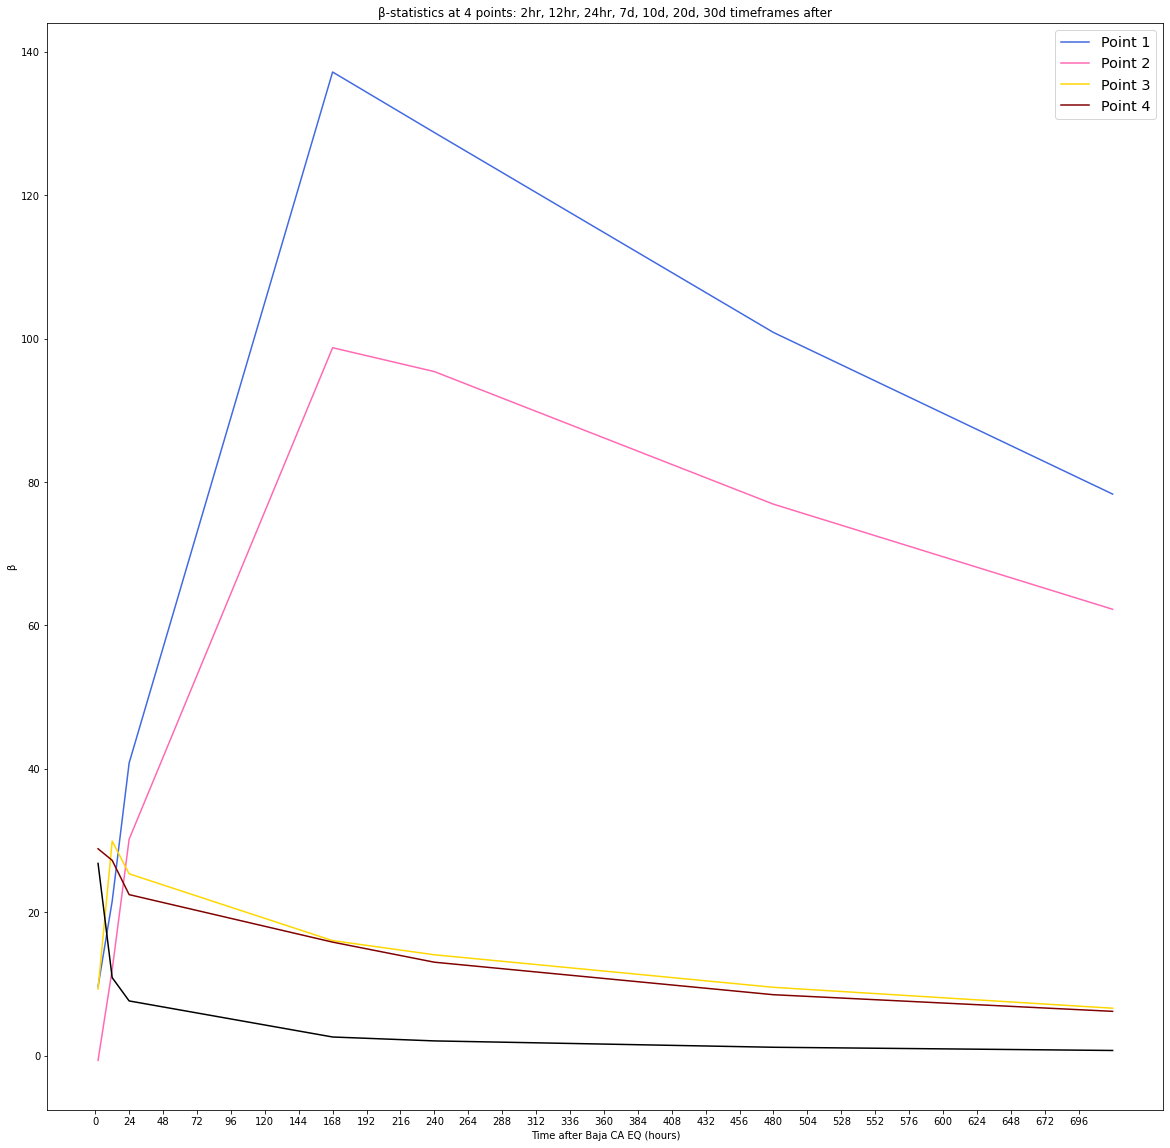

In [28]:
# Plot all timeframe βs 

plt.figure(figsize=(20,20))

plt.plot(Point1BetasDF["Timeframe (hours after)"], Point1BetasDF.BetaStat, c = "royalblue");
plt.plot(Point2BetasDF["Timeframe (hours after)"], Point2BetasDF.BetaStat, c = "hotpink");
plt.plot(Point3BetasDF["Timeframe (hours after)"], Point3BetasDF.BetaStat, c = "gold");
plt.plot(Point4BetasDF["Timeframe (hours after)"], Point4BetasDF.BetaStat, c = "maroon");
plt.plot(Point5BetasDF["Timeframe (hours after)"], Point5BetasDF.BetaStat, c = "black");

plt.xlabel("Time after Baja CA EQ (hours)");
plt.ylabel("β");
plt.title("β-statistics at 4 points: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d timeframes after");
plt.xticks(np.arange(0, 720, 24));
plt.legend(["Point 1", "Point 2", "Point 3", "Point 4"], fontsize = "x-large");

plt.savefig("Maps/Density Grid/β-statistics/ALLPoints_β_AFTER_MoC_2", facecolor = "white");